In [1]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

In [2]:
# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [3]:
# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD

In [4]:
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf
print ("Done")

Done


In [5]:
!apt-get update
!apt-get install -y libsndfile1

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Ign:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [57.7 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,068 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,601 kB]
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,417 kB]
Get:13 https://ppa.launch

In [6]:
! pip install kaggle

In [7]:
! mkdir ~/.kaggle

In [8]:
import gdown

url = '1FNE24xoOjBjCdE5bUd_myxLioF0IWkZg'
out = 'kaggle.json'
gdown.download(id=url, output=out, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1FNE24xoOjBjCdE5bUd_myxLioF0IWkZg
To: /content/kaggle.json
100%|██████████| 62.0/62.0 [00:00<00:00, 226kB/s]


'kaggle.json'

In [9]:
! cp /content/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle datasets download ejlok1/cremad

Dataset URL: https://www.kaggle.com/datasets/ejlok1/cremad
License(s): ODC Attribution License (ODC-By)
 98% 441M/451M [00:02<00:00, 174MB/s]
100% 451M/451M [00:02<00:00, 191MB/s]


In [11]:
! mkdir CREMAD
! unzip cremad.zip -d CREMAD

Streaming output truncated to the last 5000 lines.
  inflating: CREMAD/AudioWAV/1031_DFA_DIS_XX.wav  
  inflating: CREMAD/AudioWAV/1031_DFA_FEA_XX.wav  
  inflating: CREMAD/AudioWAV/1031_DFA_HAP_XX.wav  
  inflating: CREMAD/AudioWAV/1031_DFA_NEU_XX.wav  
  inflating: CREMAD/AudioWAV/1031_DFA_SAD_XX.wav  
  inflating: CREMAD/AudioWAV/1031_IEO_ANG_HI.wav  
  inflating: CREMAD/AudioWAV/1031_IEO_ANG_LO.wav  
  inflating: CREMAD/AudioWAV/1031_IEO_ANG_MD.wav  
  inflating: CREMAD/AudioWAV/1031_IEO_DIS_HI.wav  
  inflating: CREMAD/AudioWAV/1031_IEO_DIS_LO.wav  
  inflating: CREMAD/AudioWAV/1031_IEO_DIS_MD.wav  
  inflating: CREMAD/AudioWAV/1031_IEO_FEA_HI.wav  
  inflating: CREMAD/AudioWAV/1031_IEO_FEA_LO.wav  
  inflating: CREMAD/AudioWAV/1031_IEO_FEA_MD.wav  
  inflating: CREMAD/AudioWAV/1031_IEO_HAP_HI.wav  
  inflating: CREMAD/AudioWAV/1031_IEO_HAP_LO.wav  
  inflating: CREMAD/AudioWAV/1031_IEO_HAP_MD.wav  
  inflating: CREMAD/AudioWAV/1031_IEO_NEU_XX.wav  
  inflating: CREMAD/AudioWAV/10

In [12]:
! kaggle datasets download uwrfkaggler/ravdess-emotional-speech-audio

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
 99% 427M/429M [00:03<00:00, 151MB/s]
100% 429M/429M [00:03<00:00, 148MB/s]


In [13]:
! mkdir RAVDEES
! unzip ravdess-emotional-speech-audio.zip -d RAVDEES

Archive:  ravdess-emotional-speech-audio.zip
  inflating: RAVDEES/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: RAVDEES/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: RAVDEES/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: RAVDEES/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: RAVDEES/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: RAVDEES/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: RAVDEES/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: RAVDEES/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: RAVDEES/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: RAVDEES/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: RAVDEES/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: RAVDEES/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: RAVDEES/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: RAVDEES/Actor_01/03-01-03-01-01-02-01.wav  
  inflating: RAVDEES/Actor_01/03-01-03-01-02-01-01.wav  
  inflating: RAVDEES/Actor_01/03-01-03-01-02-02-01.wav  
  inflating: RAVDEES/Actor_01/03-01-03-02-0

In [14]:
! kaggle datasets download ejlok1/surrey-audiovisual-expressed-emotion-savee

Dataset URL: https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee
License(s): copyright-authors
 99% 106M/107M [00:00<00:00, 201MB/s] 
100% 107M/107M [00:00<00:00, 190MB/s]


In [15]:
! mkdir SAVEE
! unzip surrey-audiovisual-expressed-emotion-savee.zip -d SAVEE

Archive:  surrey-audiovisual-expressed-emotion-savee.zip
  inflating: SAVEE/ALL/DC_a01.wav    
  inflating: SAVEE/ALL/DC_a02.wav    
  inflating: SAVEE/ALL/DC_a03.wav    
  inflating: SAVEE/ALL/DC_a04.wav    
  inflating: SAVEE/ALL/DC_a05.wav    
  inflating: SAVEE/ALL/DC_a06.wav    
  inflating: SAVEE/ALL/DC_a07.wav    
  inflating: SAVEE/ALL/DC_a08.wav    
  inflating: SAVEE/ALL/DC_a09.wav    
  inflating: SAVEE/ALL/DC_a10.wav    
  inflating: SAVEE/ALL/DC_a11.wav    
  inflating: SAVEE/ALL/DC_a12.wav    
  inflating: SAVEE/ALL/DC_a13.wav    
  inflating: SAVEE/ALL/DC_a14.wav    
  inflating: SAVEE/ALL/DC_a15.wav    
  inflating: SAVEE/ALL/DC_d01.wav    
  inflating: SAVEE/ALL/DC_d02.wav    
  inflating: SAVEE/ALL/DC_d03.wav    
  inflating: SAVEE/ALL/DC_d04.wav    
  inflating: SAVEE/ALL/DC_d05.wav    
  inflating: SAVEE/ALL/DC_d06.wav    
  inflating: SAVEE/ALL/DC_d07.wav    
  inflating: SAVEE/ALL/DC_d08.wav    
  inflating: SAVEE/ALL/DC_d09.wav    
  inflating: SAVEE/ALL/DC_d10.w

In [16]:
! kaggle datasets download ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 94% 404M/428M [00:01<00:00, 286MB/s]
100% 428M/428M [00:01<00:00, 261MB/s]


In [17]:
! mkdir TEES
! unzip toronto-emotional-speech-set-tess.zip -d TEES

Streaming output truncated to the last 5000 lines.
  inflating: TEES/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TEES/TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TEES/TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TEES/TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TEES/TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TEES/TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TEES/TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TEES/TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TEES/TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TEES/TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TEES/TESS Toronto emotional speech set data/OAF_angry/OAF_

In [18]:
! kaggle datasets download mostafaabdlhamed/speech-signal-features

Dataset URL: https://www.kaggle.com/datasets/mostafaabdlhamed/speech-signal-features
License(s): unknown
 97% 706M/727M [00:03<00:00, 269MB/s]
100% 727M/727M [00:03<00:00, 233MB/s]


In [19]:
! mkdir Speech_Signal_Features
! unzip speech-signal-features.zip -d Speech_Signal_Features

Archive:  speech-signal-features.zip
  inflating: Speech_Signal_Features/emotion (4).csv  


In [20]:
crema_path = '/content/CREMAD/AudioWAV/'
ravdess_path = '/content/RAVDEES/audio_speech_actors_01-24/'
savee_path = '/content/SAVEE/ALL/'
tess_path = '/content/TEES/tess toronto emotional speech set data/TESS Toronto emotional speech set data/'

In [21]:
crema_directory_list = os.listdir(crema_path)
print(crema_directory_list)

['1046_ITH_DIS_XX.wav', '1024_TSI_DIS_XX.wav', '1081_ITS_DIS_XX.wav', '1085_IEO_SAD_LO.wav', '1061_IOM_FEA_XX.wav', '1047_IWW_HAP_XX.wav', '1032_IEO_DIS_MD.wav', '1045_MTI_NEU_XX.wav', '1013_TIE_DIS_XX.wav', '1033_IWL_HAP_XX.wav', '1016_TAI_DIS_XX.wav', '1040_IWL_NEU_XX.wav', '1012_TSI_NEU_XX.wav', '1017_TAI_ANG_XX.wav', '1061_ITH_NEU_XX.wav', '1016_DFA_SAD_XX.wav', '1017_TSI_NEU_XX.wav', '1068_TAI_DIS_XX.wav', '1018_TAI_ANG_XX.wav', '1061_IOM_DIS_XX.wav', '1020_TAI_NEU_XX.wav', '1073_IEO_ANG_LO.wav', '1036_MTI_SAD_XX.wav', '1019_MTI_DIS_XX.wav', '1046_IOM_HAP_XX.wav', '1081_IEO_HAP_MD.wav', '1001_IWL_FEA_XX.wav', '1078_ITH_ANG_XX.wav', '1036_IWW_DIS_XX.wav', '1032_IEO_ANG_HI.wav', '1047_TIE_FEA_XX.wav', '1005_MTI_NEU_XX.wav', '1015_IOM_SAD_XX.wav', '1067_ITS_FEA_XX.wav', '1005_IWW_DIS_XX.wav', '1002_IEO_ANG_HI.wav', '1077_TIE_FEA_XX.wav', '1036_DFA_HAP_XX.wav', '1028_IOM_DIS_XX.wav', '1069_ITH_ANG_XX.wav', '1050_IOM_DIS_XX.wav', '1003_IOM_DIS_XX.wav', '1032_IEO_NEU_XX.wav', '1067_DFA_

In [22]:
ravdess_directory_list = os.listdir(ravdess_path)
print(ravdess_directory_list)

['Actor_13', 'Actor_16', 'Actor_11', 'Actor_06', 'Actor_01', 'Actor_23', 'Actor_03', 'Actor_22', 'Actor_05', 'Actor_18', 'Actor_02', 'Actor_09', 'Actor_12', 'Actor_15', 'Actor_14', 'Actor_08', 'Actor_19', 'Actor_24', 'Actor_17', 'Actor_10', 'Actor_04', 'Actor_21', 'Actor_20', 'Actor_07']


In [23]:
savee_directory_list = os.listdir(savee_path)
print(savee_directory_list)

['KL_h02.wav', 'JK_d14.wav', 'JK_h08.wav', 'JK_a08.wav', 'KL_n05.wav', 'JE_f10.wav', 'JK_a09.wav', 'KL_d01.wav', 'JK_su15.wav', 'KL_a06.wav', 'DC_d01.wav', 'DC_a12.wav', 'JE_h09.wav', 'KL_n13.wav', 'JK_h01.wav', 'JK_d13.wav', 'KL_a07.wav', 'JE_a03.wav', 'KL_n20.wav', 'JE_d06.wav', 'JE_d07.wav', 'KL_sa10.wav', 'JE_a09.wav', 'JE_su13.wav', 'DC_sa01.wav', 'DC_a06.wav', 'JK_su12.wav', 'JE_a10.wav', 'DC_d06.wav', 'KL_h12.wav', 'JK_d01.wav', 'JE_su03.wav', 'DC_d14.wav', 'JK_n16.wav', 'KL_a12.wav', 'KL_a08.wav', 'DC_f05.wav', 'JK_sa02.wav', 'DC_sa14.wav', 'JE_f02.wav', 'DC_f04.wav', 'KL_f03.wav', 'DC_d13.wav', 'DC_a10.wav', 'DC_f02.wav', 'KL_sa09.wav', 'KL_d05.wav', 'KL_su05.wav', 'JK_h05.wav', 'KL_sa08.wav', 'JK_f04.wav', 'JE_sa12.wav', 'JE_f05.wav', 'JE_n09.wav', 'JK_d11.wav', 'JE_f11.wav', 'JE_a12.wav', 'KL_d10.wav', 'JE_h12.wav', 'DC_f07.wav', 'JE_n01.wav', 'JK_f14.wav', 'JE_su12.wav', 'KL_n26.wav', 'JE_a15.wav', 'JK_d12.wav', 'KL_su12.wav', 'DC_n27.wav', 'KL_n21.wav', 'KL_sa07.wav', 'DC_

In [24]:
tess_directory_list = os.listdir(tess_path)
print(tess_directory_list)

['OAF_disgust', 'YAF_angry', 'OAF_angry', 'YAF_pleasant_surprised', 'YAF_happy', 'OAF_Fear', 'YAF_neutral', 'YAF_sad', 'OAF_Pleasant_surprise', 'YAF_disgust', 'YAF_fear', 'OAF_happy', 'OAF_neutral', 'OAF_Sad']


In [25]:
file_emotion = []
file_path = []

for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess_path + i)

    for f in actor:
        part = f.split('.')[0].split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess_path + i + '/' + f)

In [26]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-02-02-02-02-07.wav
03
/content/RAVDEES/audio_speech_actors_01-24/Actor_13/03-01-08-01-02-02-13.wav
7
03-01-07-02-02-01-07.wav


In [27]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral',
                             2:'neutral',
                             3:'happy',
                             4:'sad',
                             5:'angry',
                             6:'fear',
                             7:'disgust',
                             8:'surprise'},
                            inplace=True)

<ipython-input-27-8e20c27ecd83>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ravdess_df.Emotions.replace({1:'neutral',


In [28]:
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

   Emotions                                               Path
0  surprise  /content/RAVDEES/audio_speech_actors_01-24/Act...
1     happy  /content/RAVDEES/audio_speech_actors_01-24/Act...
2   neutral  /content/RAVDEES/audio_speech_actors_01-24/Act...
3     angry  /content/RAVDEES/audio_speech_actors_01-24/Act...
4     happy  /content/RAVDEES/audio_speech_actors_01-24/Act...
______________________________________________
     Emotions                                               Path
1435    angry  /content/RAVDEES/audio_speech_actors_01-24/Act...
1436  neutral  /content/RAVDEES/audio_speech_actors_01-24/Act...
1437    angry  /content/RAVDEES/audio_speech_actors_01-24/Act...
1438      sad  /content/RAVDEES/audio_speech_actors_01-24/Act...
1439  disgust  /content/RAVDEES/audio_speech_actors_01-24/Act...
_______________________________________________
Emotions
neutral     288
surprise    192
happy       192
angry       192
disgust     192
fear        192
sad         192
Name: count, dty

In [29]:
file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(crema_path + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

In [30]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
crema_df = pd.concat([emotion_df, path_df], axis=1)

In [31]:
crema_df.head()

,Emotions,Path
0,disgust,/content/CREMAD/AudioWAV/1046_ITH_DIS_XX.wav
1,disgust,/content/CREMAD/AudioWAV/1024_TSI_DIS_XX.wav
2,disgust,/content/CREMAD/AudioWAV/1081_ITS_DIS_XX.wav
3,sad,/content/CREMAD/AudioWAV/1085_IEO_SAD_LO.wav
4,fear,/content/CREMAD/AudioWAV/1061_IOM_FEA_XX.wav


In [32]:
print(crema_df.Emotions.value_counts())

Emotions
disgust    1271
sad        1271
fear       1271
happy      1271
angry      1271
neutral    1087
Name: count, dtype: int64


In [33]:
file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(tess_path + dir)

    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]

        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)

        file_path.append(tess_path + dir + '/' + file)

In [34]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
tess_df = pd.concat([emotion_df, path_df], axis=1)

In [35]:
tess_df.head()

,Emotions,Path
0,disgust,/content/TEES/tess toronto emotional speech se...
1,disgust,/content/TEES/tess toronto emotional speech se...
2,disgust,/content/TEES/tess toronto emotional speech se...
3,disgust,/content/TEES/tess toronto emotional speech se...
4,disgust,/content/TEES/tess toronto emotional speech se...


In [36]:
print(tess_df.Emotions.value_counts())

Emotions
disgust     400
angry       400
surprise    400
happy       400
fear        400
neutral     400
sad         400
Name: count, dtype: int64


In [37]:
file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(savee_path + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

In [38]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
savee_df = pd.concat([emotion_df, path_df], axis=1)

In [39]:
savee_df.head()

,Emotions,Path
0,happy,/content/SAVEE/ALL/KL_h02.wav
1,disgust,/content/SAVEE/ALL/JK_d14.wav
2,happy,/content/SAVEE/ALL/JK_h08.wav
3,angry,/content/SAVEE/ALL/JK_a08.wav
4,neutral,/content/SAVEE/ALL/KL_n05.wav


In [40]:
print(savee_df.Emotions.value_counts())

Emotions
neutral     120
happy        60
disgust      60
angry        60
fear         60
surprise     60
sad          60
Name: count, dtype: int64


In [41]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([ravdess_df, crema_df, tess_df, savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,surprise,/content/RAVDEES/audio_speech_actors_01-24/Act...
1,happy,/content/RAVDEES/audio_speech_actors_01-24/Act...
2,neutral,/content/RAVDEES/audio_speech_actors_01-24/Act...
3,angry,/content/RAVDEES/audio_speech_actors_01-24/Act...
4,happy,/content/RAVDEES/audio_speech_actors_01-24/Act...


In [42]:
print(data_path.Emotions.value_counts())

Emotions
happy       1923
angry       1923
disgust     1923
fear        1923
sad         1923
neutral     1895
surprise     652
Name: count, dtype: int64


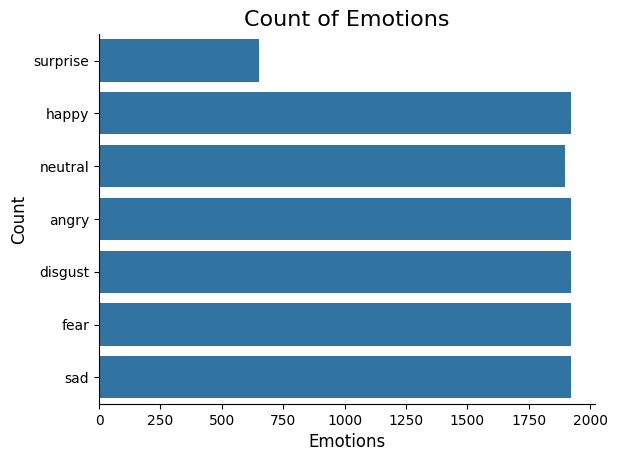

In [43]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [44]:
data,sr = librosa.load(file_path[0])
sr

22050

In [45]:
ipd.Audio(data,rate=sr)

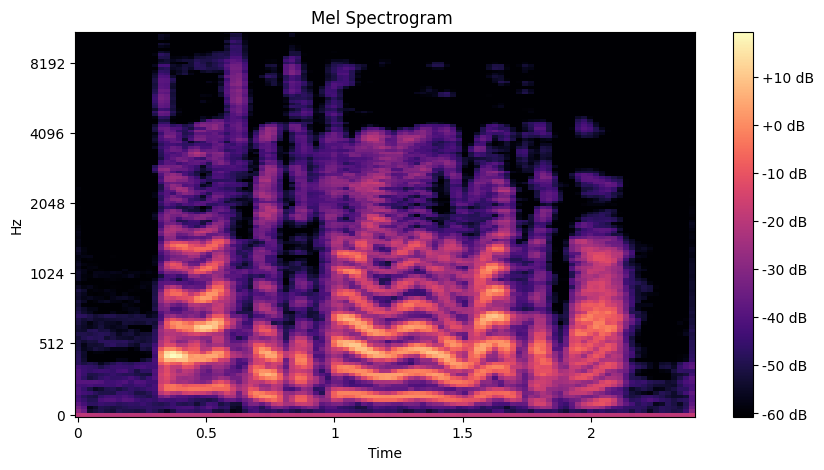

In [46]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [47]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)

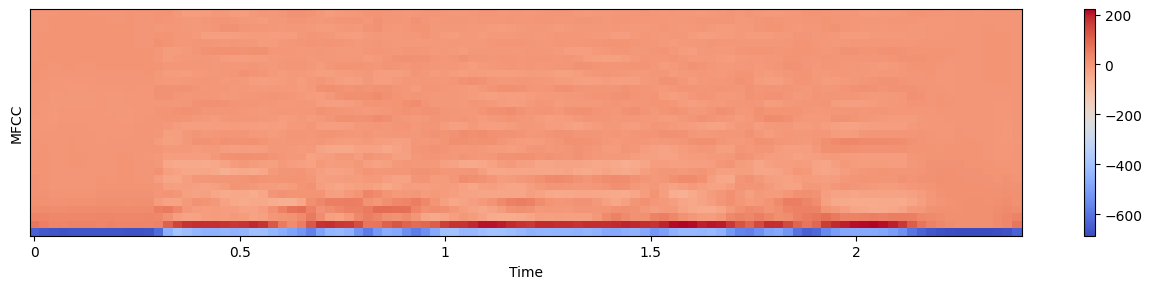

In [48]:
# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

In [49]:
ipd.Audio(data,rate=sr)

In [50]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

In [51]:
# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

In [52]:
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

In [53]:
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

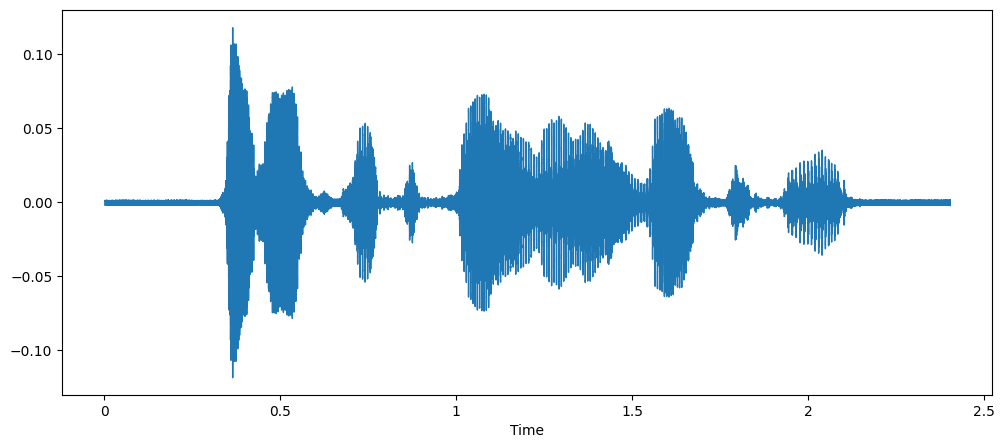

In [54]:
# NORMAL AUDIO
import librosa.display

plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)

In [55]:
ipd.Audio(data,rate=sr)

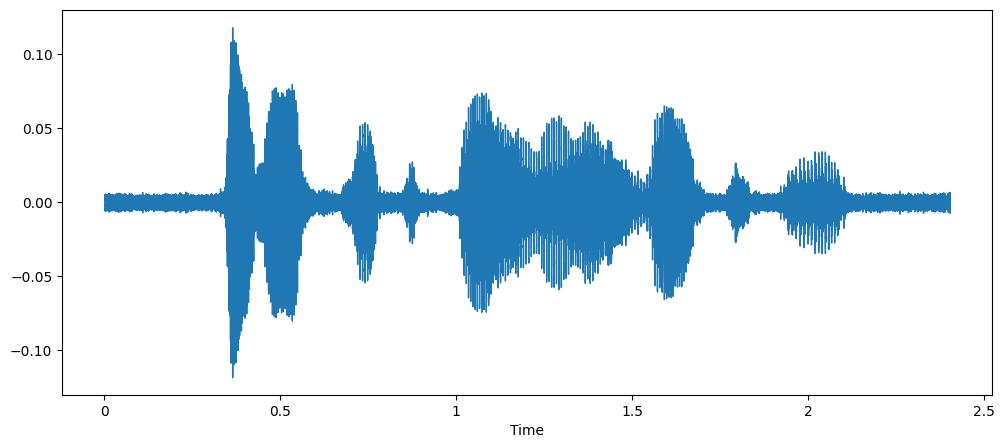

In [56]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)

In [57]:
ipd.Audio(x, rate=sr)

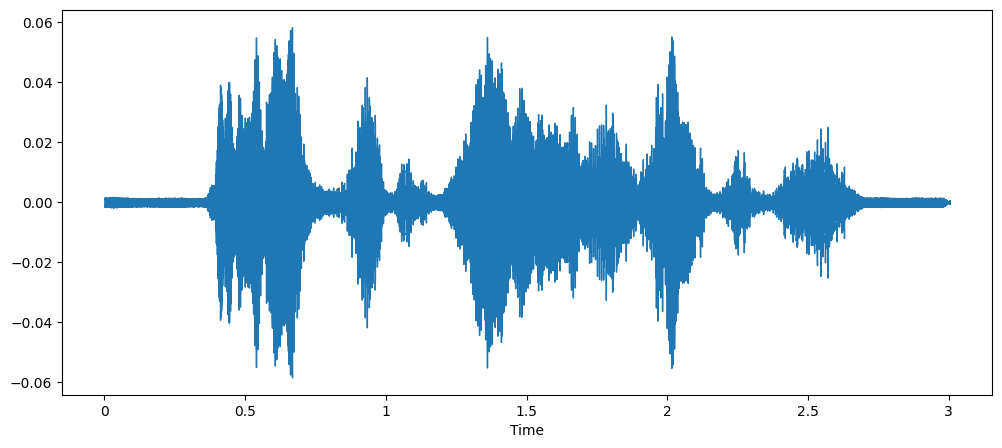

In [58]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)

In [59]:
ipd.Audio(x, rate=sr)

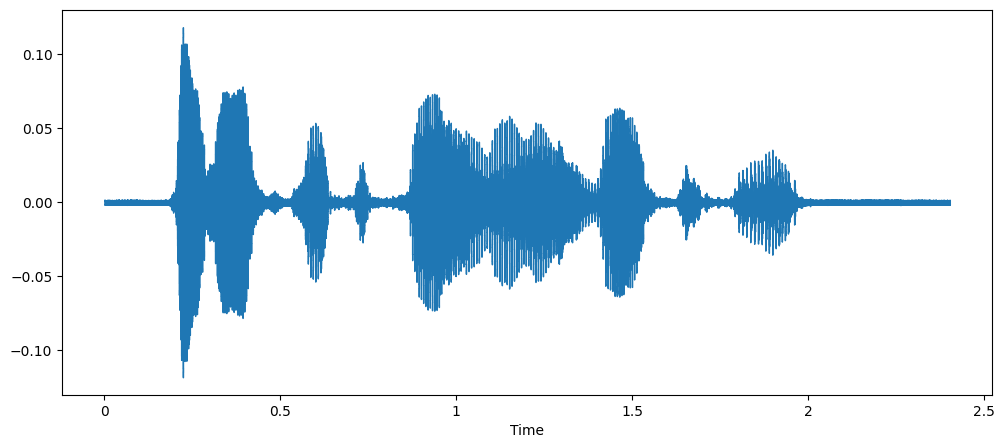

In [60]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)

In [61]:
ipd.Audio(x, rate=sr)

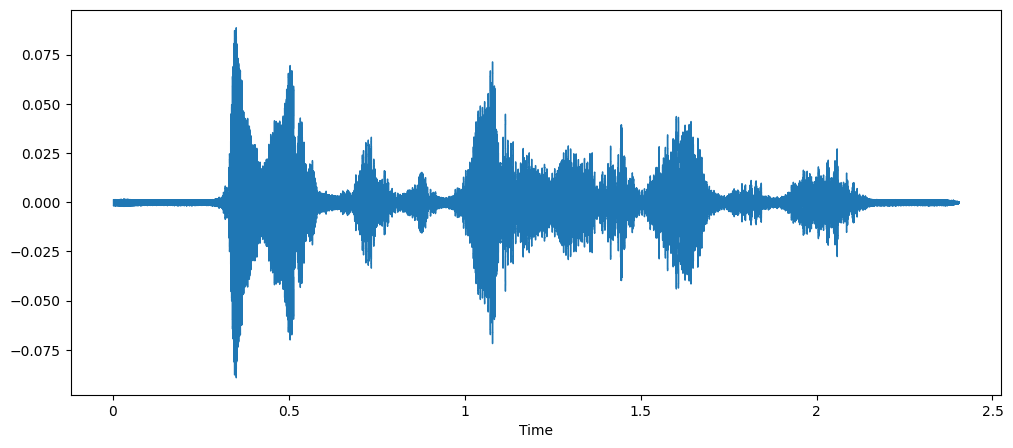

In [62]:
# AUDIO WITH PITCH
x = pitch(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)

In [63]:
ipd.Audio(x, rate=sr)

In [64]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,
                                           frame_length=frame_length,
                                           hop_length=hop_length)
    return np.squeeze(zcr)

In [65]:
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y=data,
                             frame_length=frame_length,
                             hop_length=hop_length)
    return np.squeeze(rmse)

In [66]:
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfccs = librosa.feature.mfcc(y=data,
                                 sr=sr,
                                 n_mfcc=13,
                                 hop_length=hop_length,
                                 n_fft=frame_length)
    return np.squeeze(mfccs.T) if not flatten else np.ravel(mfccs.T)

In [67]:
def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,
                          frame_length,
                          hop_length),
                      rmse(data,
                           frame_length,
                           hop_length),
                      mfcc(data,
                           sr,
                           frame_length,
                           hop_length)))
    return result

In [68]:
def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,
                         duration=duration,
                         offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)

    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,
                     aud2))

    pitched_audio=pitch(data,
                        sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,
                     aud3))

    pitched_audio1=pitch(data,
                         sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,
                     aud4))

    return audio

In [69]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  2


In [70]:
import timeit
from tqdm import tqdm

In [71]:
start = timeit.default_timer()
X,Y=[],[]

for path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):
    features=get_features(path)

    if index%500==0:
        print(f'{index} audio has been processed')

    for i in features:
        X.append(i)
        Y.append(emotion)

print('Done')

stop = timeit.default_timer()

print('Time: ', stop - start)

1it [00:00,  4.44it/s]

0 audio has been processed


501it [01:45,  3.20it/s]

500 audio has been processed


1002it [03:27,  6.23it/s]

1000 audio has been processed


1502it [05:12,  7.86it/s]

1500 audio has been processed


2002it [06:35,  8.72it/s]

2000 audio has been processed


2502it [07:57,  9.11it/s]

2500 audio has been processed


3001it [09:27,  4.38it/s]

3000 audio has been processed


3502it [10:52,  5.60it/s]

3500 audio has been processed


4002it [12:14,  7.93it/s]

4000 audio has been processed


4502it [13:40,  7.76it/s]

4500 audio has been processed


5002it [15:02,  8.37it/s]

5000 audio has been processed


5503it [16:23,  9.40it/s]

5500 audio has been processed


6001it [18:20,  7.97it/s]

6000 audio has been processed


6502it [19:43,  8.53it/s]

6500 audio has been processed


7002it [21:06,  8.01it/s]

7000 audio has been processed


7502it [22:33,  7.85it/s]

7500 audio has been processed


8001it [23:54,  9.10it/s]

8000 audio has been processed


8502it [25:15,  8.41it/s]

8500 audio has been processed


9002it [26:41,  8.29it/s]

9000 audio has been processed


9502it [27:44,  7.14it/s]

9500 audio has been processed


10002it [28:45, 12.70it/s]

10000 audio has been processed


10503it [29:56,  7.64it/s]

10500 audio has been processed


11002it [31:10, 12.49it/s]

11000 audio has been processed


11502it [32:13,  7.80it/s]

11500 audio has been processed


12002it [33:46,  6.52it/s]

12000 audio has been processed


12162it [34:14,  5.92it/s]

Done
Time:  2054.851776446


In [ ]:
"""
from joblib import Parallel, delayed
import timeit
start = timeit.default_timer()
# Define a function to get features for a single audio file
def process_feature(path, emotion):
    features = get_features(path)
    X = []
    Y = []
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
    return X, Y

paths = data_path.Path
emotions = data_path.Emotions

# Run the loop in parallel
results = Parallel(n_jobs=-1)(delayed(process_feature)(path, emotion) for (path, emotion) in zip(paths, emotions))

# Collect the results
X = []
Y = []
for result in results:
    x, y = result
    X.extend(x)
    Y.extend(y)


stop = timeit.default_timer()

print('Time: ', stop - start)
"""

"\nfrom joblib import Parallel, delayed\nimport timeit\nstart = timeit.default_timer()\n# Define a function to get features for a single audio file\ndef process_feature(path, emotion):\n    features = get_features(path)\n    X = []\n    Y = []\n    for ele in features:\n        X.append(ele)\n        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.\n        Y.append(emotion)\n    return X, Y\n\npaths = data_path.Path\nemotions = data_path.Emotions\n\n# Run the loop in parallel\nresults = Parallel(n_jobs=-1)(delayed(process_feature)(path, emotion) for (path, emotion) in zip(paths, emotions))\n\n# Collect the results\nX = []\nY = []\nfor result in results:\n    x, y = result\n    X.extend(x)\n    Y.extend(y)\n\n\nstop = timeit.default_timer()\n\nprint('Time: ', stop - start)\n"

In [72]:
len(X), len(Y), data_path.Path.shape

(48648, 48648, (12162,))

In [73]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,1611,1612,1613,1614,1615,1616,1617,1618,1619,Emotions
0,0.145020,0.289551,0.478516,0.526855,0.513672,0.429199,0.334473,0.308105,0.364258,0.441406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,surprise
1,0.251465,0.377441,0.500977,0.507324,0.499023,0.488281,0.481934,0.475098,0.480957,0.492676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,surprise
2,0.082031,0.149902,0.227539,0.231445,0.195801,0.145020,0.128418,0.131348,0.179199,0.241211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,surprise
3,0.244629,0.368164,0.492676,0.493164,0.500000,0.496094,0.495117,0.491699,0.494141,0.502930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,surprise
4,0.247070,0.342285,0.361816,0.285645,0.317871,0.355957,0.477539,0.507324,0.530762,0.397461,...,35.528572,19.440212,6.206988,3.584337,1.783306,-4.75233,-7.625538,-5.285535,-7.22468,happy


In [74]:
emotions = pd.read_csv('/content/emotion.csv')
emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,1611,1612,1613,1614,1615,1616,1617,1618,1619,Emotions
0,0.145020,0.289551,0.478516,0.526855,0.513672,0.429199,0.334473,0.308105,0.364258,0.441406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,surprise
1,0.251465,0.377441,0.500977,0.507324,0.499023,0.488281,0.481934,0.475098,0.480957,0.492676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,surprise
2,0.082031,0.149902,0.227539,0.231445,0.195801,0.145020,0.128418,0.131348,0.179199,0.241211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,surprise
3,0.244629,0.368164,0.492676,0.493164,0.500000,0.496094,0.495117,0.491699,0.494141,0.502930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,surprise
4,0.247070,0.342285,0.361816,0.285645,0.317871,0.355957,0.477539,0.507324,0.530762,0.397461,...,35.528572,19.440212,6.206988,3.584337,1.783306,-4.75233,-7.625538,-5.285535,-7.22468,happy


In [75]:
print(emotions.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
1616         True
1617         True
1618         True
1619         True
Emotions    False
Length: 1621, dtype: bool


In [76]:
emotions = emotions.fillna(0)
print(emotions.isna().any())
emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
1616        False
1617        False
1618        False
1619        False
Emotions    False
Length: 1621, dtype: bool


(48648, 1621)

In [77]:
np.sum(emotions.isna())

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
0,0
1,0
2,0
3,0
4,0
...,...
1616,0
1617,0
1618,0
1619,0


In [78]:
X = emotions.iloc[: ,:-1].values
Y = emotions['Emotions'].values

In [79]:
# As this is a multiclass classification problem onehotencoding our Y
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [80]:
print(Y.shape)
X.shape

(48648, 7)


(48648, 1620)

In [81]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0,test_size=0.2, shuffle=True)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 1620), (38918, 7), (9730, 1620), (9730, 7))

In [82]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [83]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 1620), (38918, 7), (9730, 1620), (9730, 7))

In [84]:
model_checkpoint = ModelCheckpoint('best_model1_weights.keras', monitor='val_accuracy', save_best_only=True)

In [85]:
early_stop=EarlyStopping(monitor='val_acc',
                         mode='auto',
                         patience=5,
                         restore_best_weights=True)

In [86]:
lr_reduction=ReduceLROnPlateau(monitor='val_acc',
                               patience=3,
                               verbose=1,
                               factor=0.5,
                               min_lr=0.00001)

In [ ]:
"""
model01=Sequential()
model01.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.3))
model01.add(LSTM(128))
#model01.add(Dropout(0.3))
model01.add(Dense(7,activation = 'softmax'))
model01.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model01.summary()
"""

"\nmodel01=Sequential()\nmodel01.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))\nmodel01.add(Dropout(0.2))\nmodel01.add(LSTM(128,return_sequences=True))\n#model01.add(Dropout(0.2))\nmodel01.add(LSTM(128,return_sequences=True))\n#model01.add(Dropout(0.2))\nmodel01.add(LSTM(128,return_sequences=True))\n#model01.add(Dropout(0.2))\nmodel01.add(LSTM(128,return_sequences=True))\n#model01.add(Dropout(0.2))\nmodel01.add(LSTM(128,return_sequences=True))\n#model01.add(Dropout(0.3))\nmodel01.add(LSTM(128))\n#model01.add(Dropout(0.3))\nmodel01.add(Dense(7,activation = 'softmax'))\nmodel01.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])\nmodel01.summary()\n"

In [ ]:
"""
hist=model01.fit(X_train,
                 y_train,
                 epochs=20,
                 validation_data=(X_test,
                                  y_test),
                 batch_size=64,
                 verbose=1)
"""

'\nhist=model01.fit(X_train,\n                 y_train,\n                 epochs=20,\n                 validation_data=(X_test,\n                                  y_test),\n                 batch_size=64,\n                 verbose=1)\n'

In [ ]:
"""
print("Accuracy of our model on test data : " , model01.evaluate(X_test,y_test)[1]*100 , "%")

epochs = [i for i in range(20)]

fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
test_acc = hist.history['val_accuracy']
test_loss = hist.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()
"""

'\nprint("Accuracy of our model on test data : " , model01.evaluate(X_test,y_test)[1]*100 , "%")\n\nepochs = [i for i in range(20)]\n\nfig , ax = plt.subplots(1,2)\ntrain_acc = hist.history[\'accuracy\']\ntrain_loss = hist.history[\'loss\']\ntest_acc = hist.history[\'val_accuracy\']\ntest_loss = hist.history[\'val_loss\']\n\nfig.set_size_inches(20,6)\nax[0].plot(epochs , train_loss , label = \'Training Loss\')\nax[0].plot(epochs , test_loss , label = \'Testing Loss\')\nax[0].set_title(\'Training & Testing Loss\')\nax[0].legend()\nax[0].set_xlabel("Epochs")\n\nax[1].plot(epochs , train_acc , label = \'Training Accuracy\')\nax[1].plot(epochs , test_acc , label = \'Testing Accuracy\')\nax[1].set_title(\'Training & Testing Accuracy\')\nax[1].legend()\nax[1].set_xlabel("Epochs")\nplt.show()\n'

In [87]:
#Reshape for CNN_LSTM MODEL

x_traincnn = np.expand_dims(x_train, axis=2)
x_testcnn = np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((38918, 1620, 1), (38918, 7), (9730, 1620, 1), (9730, 7))

In [88]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer

    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [90]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1620, 512)           │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1620, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 810, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 810, 512)            │       1,311,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 810, 512)            │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 405, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 405, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 405, 256)            │         655,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 405, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 203, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 203, 256)            │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 203, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 102, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 102, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 102, 128)            │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 102, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 51, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 51, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6528)                │              

 Total params: 5,620,359 (21.44 MB)

 Trainable params: 5,616,007 (21.42 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [91]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)

In [92]:
history = model.fit(x_traincnn,
                    y_train,
                    epochs=30,
                    validation_data=(x_testcnn,
                                     y_test),
                    batch_size=64,
                    callbacks=[early_stop,
                               lr_reduction,
                               model_checkpoint])

Epoch 1/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.3989 - loss: 1.6685

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


609/609 ━━━━━━━━━━━━━━━━━━━━ 157s 223ms/step - accuracy: 0.3990 - loss: 1.6682 - val_accuracy: 0.3594 - val_loss: 1.6690 - learning_rate: 0.0010
Epoch 2/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 165s 191ms/step - accuracy: 0.5095 - loss: 1.2569 - val_accuracy: 0.5035 - val_loss: 1.2927 - learning_rate: 0.0010
Epoch 3/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 150s 204ms/step - accuracy: 0.5606 - loss: 1.1263 - val_accuracy: 0.5739 - val_loss: 1.1025 - learning_rate: 0.0010
Epoch 4/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 125s 205ms/step - accuracy: 0.5970 - loss: 1.0474 - val_accuracy: 0.5628 - val_loss: 1.1386 - learning_rate: 0.0010
Epoch 5/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 139s 200ms/step - accuracy: 0.6242 - loss: 0.9671 - val_accuracy: 0.6047 - val_loss: 1.0298 - learning_rate: 0.0010
Epoch 6/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 122s 200ms/step - accuracy: 0.6654 - loss: 0.8652 - val_accuracy: 0.6717 - val_loss: 0.8580 - learning_rate: 0.0010
Epoch 7/30
609/609 ━━━━━━━━━━━━━━━━━━━━ 142s 200ms/step - accuracy: 0.7027 

In [93]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

305/305 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9571 - loss: 0.1517
Accuracy of our model on test data :  95.75539827346802 %


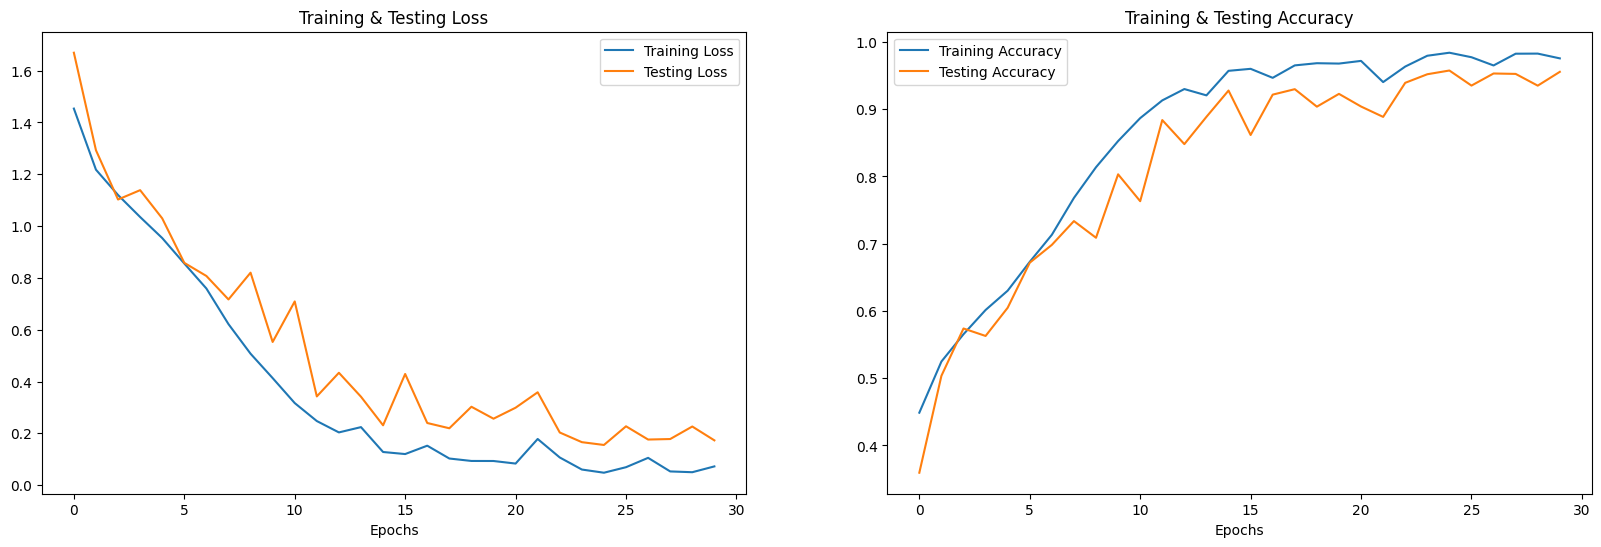

In [103]:
epochs = [i for i in range(30)]

fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [95]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

305/305 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step


In [96]:
# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

,Predicted Labels,Actual Labels
0,disgust,disgust
1,surprise,surprise
2,disgust,disgust
3,happy,fear
4,surprise,surprise
5,disgust,disgust
6,sad,sad
7,disgust,disgust
8,fear,fear
9,disgust,disgust


In [97]:
#Build the model

# define model
"""model000 = Sequential()
model000.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X.shape[1], 1)))
model000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model000.add(BatchNormalization())
model000.add(Dropout(0.3))


model000.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model000.add(BatchNormalization())
model000.add(Dropout(0.3))

model000.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model000.add(BatchNormalization())
model000.add(Dropout(0.3))

model000.add(LSTM(128, return_sequences=True))
model000.add(Dropout(0.3))

model000.add(LSTM(128, return_sequences=True))
model000.add(Dropout(0.3))
model000.add(LSTM(128))
model000.add(Dropout(0.3))

model000.add(Dense(128, activation='relu'))
#model000.add(Dropout(0.3))

model000.add(Dense(64, activation='relu'))
#model000.add(Dropout(0.3))

model000.add(Dense(32, activation='relu'))
#model000.add(Dropout(0.3))

model000.add(Dense(7, activation='softmax'))



model000.summary()"""

"model000 = Sequential()\nmodel000.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X.shape[1], 1)))\nmodel000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))\nmodel000.add(BatchNormalization())\nmodel000.add(Dropout(0.3))\n\n          \nmodel000.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))\nmodel000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))\nmodel000.add(BatchNormalization())\nmodel000.add(Dropout(0.3))\n\nmodel000.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))\nmodel000.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))\nmodel000.add(BatchNormalization())\nmodel000.add(Dropout(0.3))\n          \nmodel000.add(LSTM(128, return_sequences=True)) \nmodel000.add(Dropout(0.3))\n\nmodel000.add(LSTM(128, return_sequences=True)) \nmodel000.add(Dropout(0.3))\nmodel000.add(LSTM(128))\nmodel000.add(Dropout(0.3))\n\nmodel000.add(Dense(128, activatio

In [98]:
"""from keras.utils.vis_utils import plot_model
plot_model( model000, show_shapes=True, show_layer_names=True, to_file='model000.png')"""

"from keras.utils.vis_utils import plot_model\nplot_model( model000, show_shapes=True, show_layer_names=True, to_file='model000.png')"

In [99]:
"""model000.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])"""

"model000.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])"

In [100]:
"""hist1=model000.fit(x_traincnn, y_train, batch_size=64, epochs=40, validation_data=(x_testcnn, y_test))"""

'hist1=model000.fit(x_traincnn, y_train, batch_size=64, epochs=40, validation_data=(x_testcnn, y_test))'

In [101]:
"""print("Accuracy of our model on test data : " , model000.evaluate(x_testcnn,y_test)[1]*100 , "%")
epochs = [i for i in range(40)]
fig , ax = plt.subplots(1,2)
train_acc = hist1.history['accuracy']
train_loss = hist1.history['loss']
test_acc = hist1.history['val_accuracy']
test_loss = hist1.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()"""

'print("Accuracy of our model on test data : " , model000.evaluate(x_testcnn,y_test)[1]*100 , "%")\nepochs = [i for i in range(40)]\nfig , ax = plt.subplots(1,2)\ntrain_acc = hist1.history[\'accuracy\']\ntrain_loss = hist1.history[\'loss\']\ntest_acc = hist1.history[\'val_accuracy\']\ntest_loss = hist1.history[\'val_loss\']\n\nfig.set_size_inches(20,6)\nax[0].plot(epochs , train_loss , label = \'Training Loss\')\nax[0].plot(epochs , test_loss , label = \'Testing Loss\')\nax[0].set_title(\'Training & Testing Loss\')\nax[0].legend()\nax[0].set_xlabel("Epochs")\n\nax[1].plot(epochs , train_acc , label = \'Training Accuracy\')\nax[1].plot(epochs , test_acc , label = \'Testing Accuracy\')\nax[1].set_title(\'Training & Testing Accuracy\')\nax[1].legend()\nax[1].set_xlabel("Epochs")\nplt.show()'

In [102]:
# predicting on test data.
"""pred_test00 = model000.predict(x_testcnn)
y_pred00 = encoder.inverse_transform(pred_test)
y_test00 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred00.flatten()
df0['Actual Labels'] = y_test00.flatten()

df0.head(10)"""

"pred_test00 = model000.predict(x_testcnn)\ny_pred00 = encoder.inverse_transform(pred_test)\ny_test00 = encoder.inverse_transform(y_test)\n\n# Check for random predictions\ndf0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])\ndf0['Predicted Labels'] = y_pred00.flatten()\ndf0['Actual Labels'] = y_test00.flatten()\n\ndf0.head(10)"

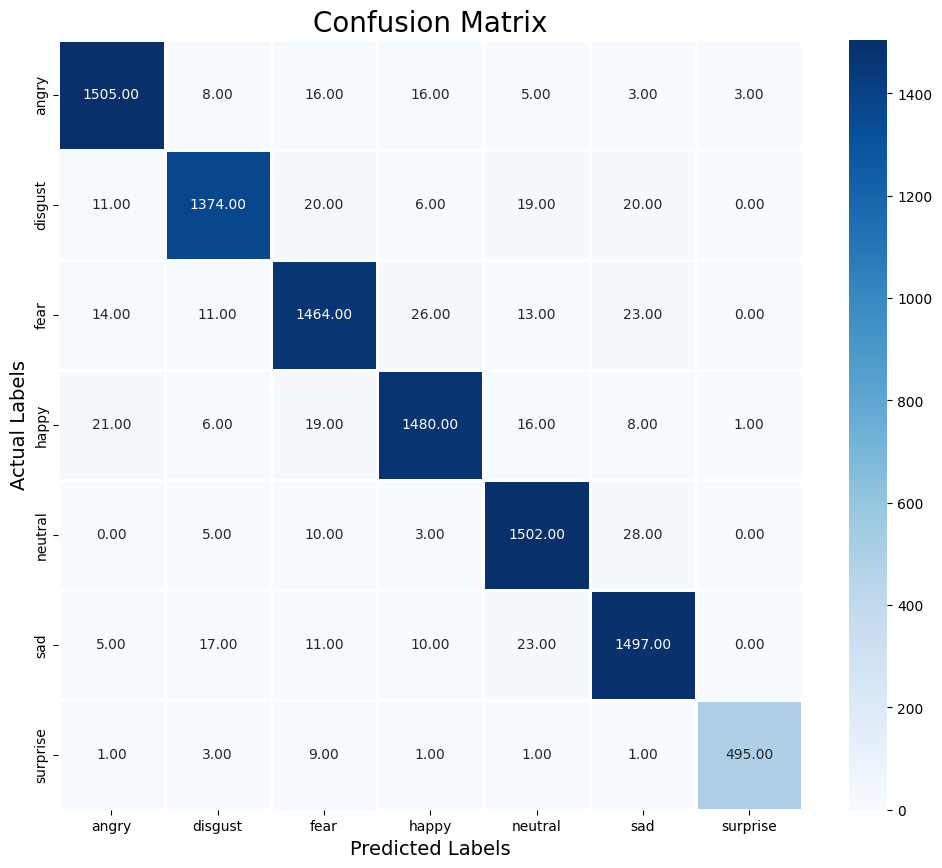

In [105]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test0, y_pred0)

plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm,
                  index = [i for i in encoder.categories_],
                  columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [106]:
print(classification_report(y_test0, y_pred0))

              precision    recall  f1-score   support

       angry       0.97      0.97      0.97      1556
     disgust       0.96      0.95      0.96      1450
        fear       0.95      0.94      0.94      1551
       happy       0.96      0.95      0.96      1551
     neutral       0.95      0.97      0.96      1548
         sad       0.95      0.96      0.95      1563
    surprise       0.99      0.97      0.98       511

    accuracy                           0.96      9730
   macro avg       0.96      0.96      0.96      9730
weighted avg       0.96      0.96      0.96      9730



In [109]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json

model_json = model.to_json()
with open("CNN_model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("CNN_model_weights.weights.h5")
print("Saved model to disk")

Saved model to disk


In [110]:
from tensorflow.keras.models import Sequential, model_from_json

json_file = open('/content/CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

In [111]:
# load weights into new model
loaded_model.load_weights("/content/best_model1_weights.keras")
print("Loaded model from disk")

Loaded model from disk


In [112]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [113]:
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

305/305 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9571 - loss: 0.1517
compile_metrics: 95.76%


In [147]:
import pickle

# Saving scaler
with open('scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)


print("Done")

Done


In [ ]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

In [ ]:
def get_predict_feat(path):
    d, s_rate= librosa.load(path, duration=2.5, offset=0.6)
    res=extract_features(d)
    result=np.array(res)
    result=np.reshape(result,newshape=(1,2376))
    i_result = scaler2.transform(result)
    final_result=np.expand_dims(i_result, axis=2)

    return final_result

In [ ]:
res=get_predict_feat("/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-07-01-01-01-01.wav")
print(res.shape)

In [ ]:
emotions1={1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',8:'Surprise'}
def prediction(path1):
    res=get_predict_feat(path1)
    predictions=loaded_model.predict(res)
    y_pred = encoder2.inverse_transform(predictions)
    print(y_pred[0][0])

In [ ]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav")

In [ ]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-01-01.wav")

In [ ]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-05-01-02-02-01.wav")

In [ ]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_21/03-01-04-02-02-02-21.wav")

In [ ]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-06-01-02-02-02.wav")

In [ ]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-08-01-01-01-01.wav")

In [ ]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-07-01-01-01-01.wav")